## <span style="color:#2F749F;"><strong>📦 Sesión práctica 4: Introducción a datos atípicos</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_4_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

## Santiago Correa Marulanda-1033486496
## Alejandro Orrego Roldan-1007585502

Relacione sus datos y los del compañero de trabajo

# <span style="color:#2F749F;"><strong>Ejercicio 1: Intervalo IQR</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

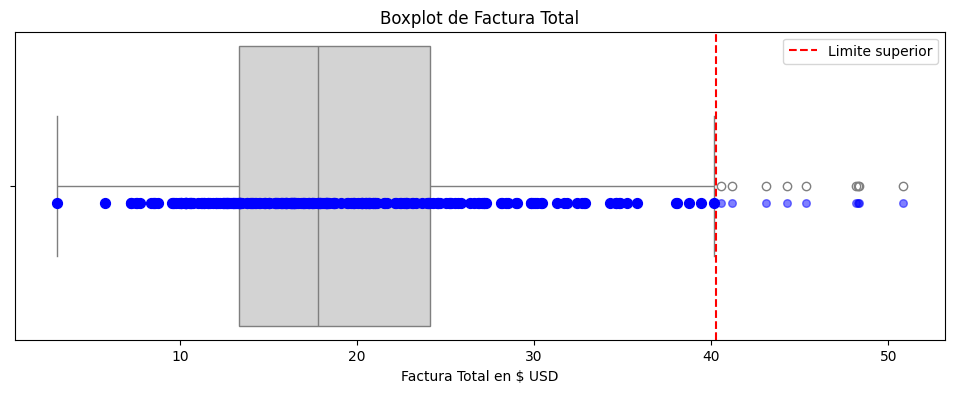

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
total_bill = tips["total_bill"].values
Q1, Q3 = np.percentile(total_bill, [25, 75])
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
data_a = total_bill[(total_bill < lim_inf) | (total_bill > lim_sup)]
data_b = total_bill[(total_bill >= lim_inf) & (total_bill <= lim_sup)]

plt.figure(figsize=(12,4))
sns.boxplot(x=total_bill, color="lightgray")
plt.scatter(data_a, [0.05]*len(data_a), color="blue", s=30, alpha=0.5)
plt.scatter(data_b, [0.05]*len(data_b), color="blue", s=50, zorder=5)
plt.xlabel("Factura Total en $ USD")
plt.title("Boxplot de Factura Total")
plt.axvline(x=lim_sup, linestyle="--", color="Red", label="Limite superior")
plt.legend()
plt.show()


Consideramos como atipicos las facturas superiores a 40 dolares

# <span style="color:#2F749F;"><strong>Ejercicio 2: Graficos de dispersión</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

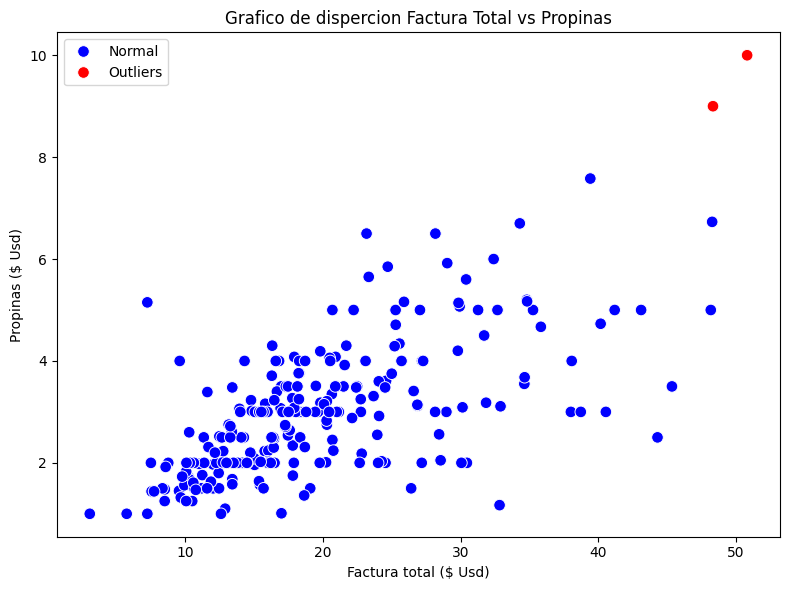

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tips = sns.load_dataset("tips")

x = tips["total_bill"].values
y = tips["tip"].values

x_mean = np.mean(x)
x_std = np.std(x)
y_mean=np.mean(y)
y_std = np.std(y)
outliers = ((np.abs(x - x_mean) > 4 * x_std) |(np.abs(y - y_mean) > 4 * y_std))

labels = np.where(outliers, "Outliers", "Normal")
plt.figure(figsize=(8,6))
sns.scatterplot(x=x, y=y, hue=labels,palette={"Normal": "blue", "Outliers": "red"}, s=70)
plt.xlabel("Factura total ($ Usd)")
plt.ylabel("Propinas ($ Usd)")
plt.title("Grafico de dispercion Factura Total vs Propinas")
plt.tight_layout()
plt.show()


Aunque hay una tendencia lineal directa, es raro encontrar facturas altas con propinas altas, consideramos outliers aquellas facturas que están cerca de 50 dolares y tienen propinas alrededor de 10 dolares

# <span style="color:#2F749F;"><strong>Ejercicio 3: Histogramas y funciones de densidad</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

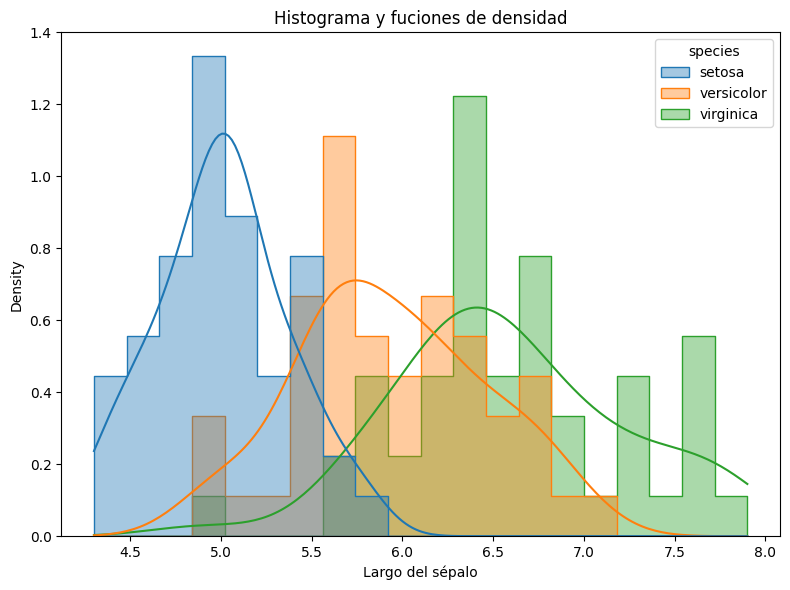

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = sns.load_dataset("iris")
x = iris["sepal_length"].values

plt.figure(figsize=(8,6))
sns.histplot(data = iris, x="sepal_length", hue="species", bins=20,kde=True, element="step", stat="density", common_norm=False, alpha=0.4)
plt.xlabel("Largo del sépalo")
plt.title("Histograma y fuciones de densidad")
plt.tight_layout()
plt.show()


A juzgar por las distribuciones de cada clase, se pueden encontrar outliers en la especie Virginica debido a sus colas largas en ambos extremos, posiblemente se presenten en la especie Versicolor unos pocos outliers

# <span style="color:#2F749F;"><strong>Ejercicio 4: Z-Score</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

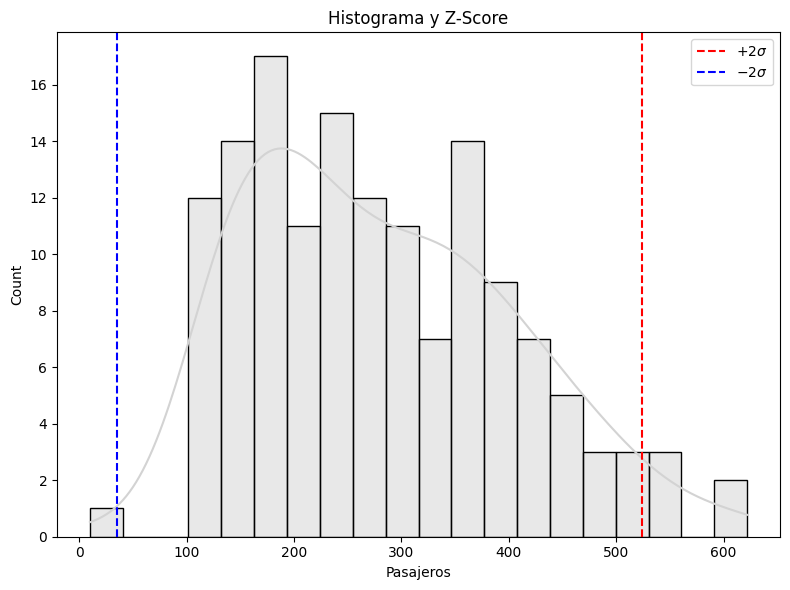

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

flights = sns.load_dataset("flights")
x = flights["passengers"].values

x = np.append(x, [10, 500])

z_scores = zscore(x)
data_b = np.abs(z_scores) > 2

x_mean = np.mean(x)
x_std = np.std(x)

plt.figure(figsize=(8,6))
sns.histplot(x=x, bins=20, kde=True, color="lightgray")
plt.scatter(x[data_b], np.zeros_like(x[data_b]), color="red", s=50, marker=" ")
plt.axvline(x_mean + 2*x_std, color="red", linestyle="--", label=r"$+2\sigma$")
plt.axvline(x_mean - 2*x_std, color="blue", linestyle="--", label=r"$-2\sigma$")
plt.title("Histograma y Z-Score")
plt.xlabel("Pasajeros")
plt.legend()
plt.tight_layout()
plt.show()

Los limites calculados nos muestran que es raro encontrar vuelos con menos de 100 pasajeros, tanto asi que los unicos datos son aquellos que están cerca de 10, por el otro extremo, aunque no sea tan extraño, no es comun vuelos con mas de 550 pasajeros aproximadamente

# <span style="color:#2F749F;"><strong>Ejercicio 5: K-means</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

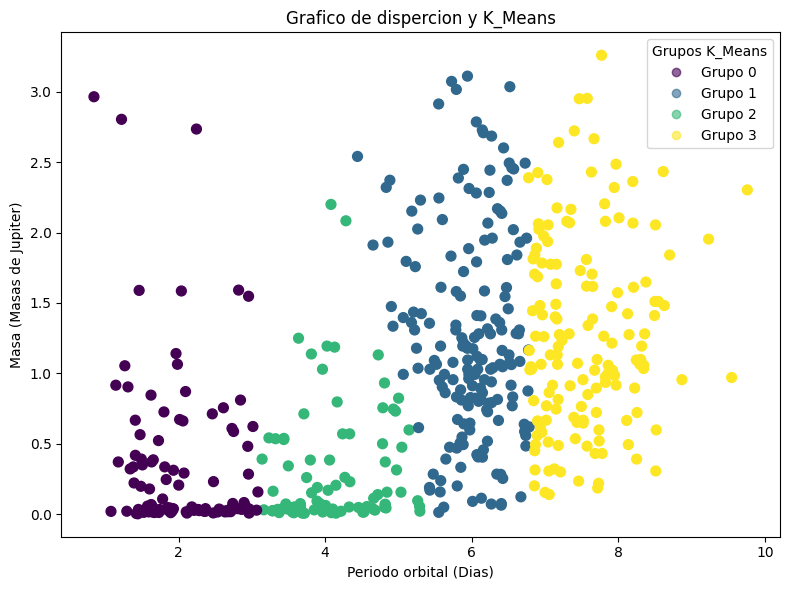

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

planets = sns.load_dataset("planets").dropna(subset=["orbital_period", "mass"])
X = planets[["orbital_period", "mass"]].values
X = np.log1p(X)

kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
labels = kmeans.labels_

plt.figure(figsize=(8,6))
scatter = plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=50)
handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
plt.legend(handles, [f"Grupo {i}" for i in range(len(handles))], title="Grupos K_Means", loc="best")
plt.title("Grafico de dispercion y K_Means")
plt.xlabel("Periodo orbital (Dias)")
plt.ylabel("Masa (Masas de Jupiter)")
plt.tight_layout()
plt.show()


Graficamente se observa principalmente que se pueden encontrar outliers univariados, es decir planetas que segun su periodo orbital tienen una masa muy grande